Create a Python script to perform a sentiment analysis of the Twitter activity of various news outlets, and to present your findings visually.

--> Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: **BBC, CBS, CNN, Fox, and New York times**.

---------------------------------------------------------------------------------------------------------
1. The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last **100** tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

--------------------------------------------------------------------------------------------------------
2. The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

--------------------------------------------------------------------------------------------------------

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

--------------------------------------------------------------------------------------------------------
Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
* Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

--------------------------------------------------------------------------------------------------------
As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* Include a written description of THREE observable trends based on the data.
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.


Script
--------------

In [128]:
#Import Dependencies
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import tweepy

In [129]:
#Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, consumer_secret,
                   access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

Pulling Tweets
-----------------

In [130]:
# Target Search Terms
target_terms = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

# Array to hold sentiment
sentiments = []

# Declare variables for sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Variable for holding the oldest tweet
oldest_tweet = ""
i = 0
counter = 1


# Loop through all target users
for target in target_terms:
    i+=1
    
    # Pull 100 tweets
    public_tweets = api.user_timeline(target, count=100)
    
    # Loop through the 100 tweets
    for tweet in public_tweets:
        text=tweet["text"]
        
      # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]
        
        # Add each value to the appropriate array
        sentiments.append({"User": target,
                           "text":text,
                       "Date": tweet["created_at"], 
                       "Compound": compound,
                       "Positive": pos,
                       "Negative": neu,
                       "Neutral": neg,
                       "Tweets Ago": counter})
    counter+=1
    
    # Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)

#Save as a CSV file

sentiments_pd.to_csv("Results/Sentiments.csv")
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User,text
0,-0.4404,Wed Aug 29 07:23:05 +0000 2018,0.868,0.132,0.00,1,@BBC,☕️ A coffee-delivering drone that can detect w...
1,0.0000,Wed Aug 29 07:00:12 +0000 2018,1.000,0.000,0.00,1,@BBC,Everyone should get to go to the beach. https:...
2,0.0000,Tue Aug 28 18:56:05 +0000 2018,1.000,0.000,0.00,1,@BBC,🐢 Scientists have found new evidence confirmin...
3,0.5423,Tue Aug 28 18:03:04 +0000 2018,0.780,0.000,0.22,1,@BBC,A conversation with a homeless man inspired St...
4,0.0000,Tue Aug 28 16:01:02 +0000 2018,1.000,0.000,0.00,1,@BBC,😂 If Britney's songs were Scottish. https://t....


Scatter Plot
--------

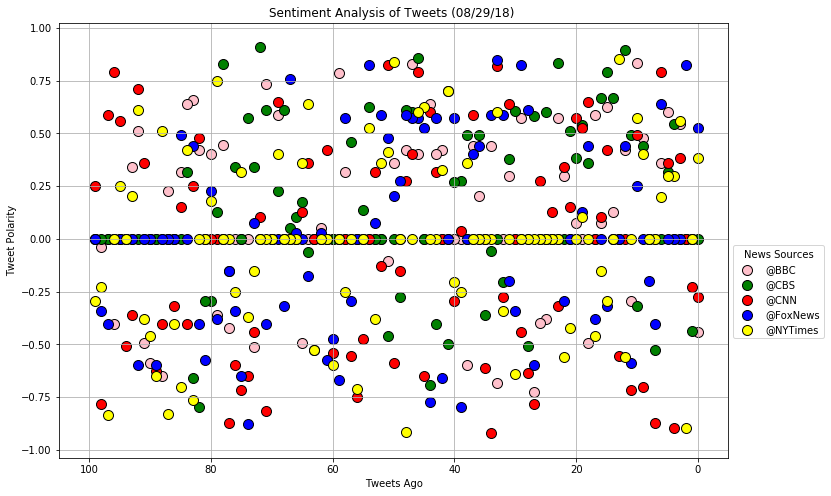

In [131]:
#Define the pallette
colors = ["pink","green","red","blue","yellow"]
user=sentiments_pd["User"].unique()

i=0
plt.figure(figsize=(12,8))
for channel in target_terms:
    tweet_ago = np.arange(len(sentiments_pd[sentiments_pd['User']==channel]['Compound']))
    plt.scatter(tweet_ago, sentiments_pd[sentiments_pd['User']==channel]['Compound'],  marker ='o', color=colors[i], s=100,edgecolor="black", label = channel)
    i+=1
plt.title("Sentiment Analysis of Tweets (%s) " % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.legend(loc = 'best',bbox_to_anchor=(1, 0.5), title = 'News Sources', frameon=True)
plt.savefig("Images/Sentiment_Analysis.png")
plt.grid(True)
plt.show()

Bar Graph 
--------------------------------------------------

In [132]:
#Collect the compound values for each news source
sentiments = sentiments_pd.pivot_table(index='User',  values="Compound", aggfunc=np.mean)
sentiments

,Compound
User,
@BBC,0.100676
@CBS,0.126417
@CNN,-0.032745
@FoxNews,0.016972
@NYTimes,-0.008256


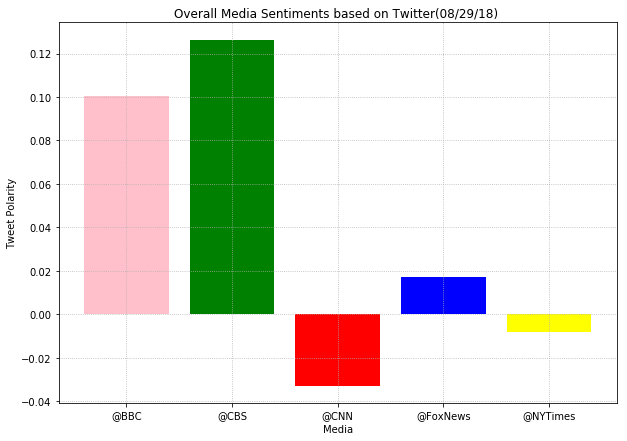

In [133]:
#Plot
x_axis = np.arange(len(sentiments.index.values))
tick_locations = [value+0.4 for value in x_axis]
fig,ax=plt.subplots(figsize=(10, 7))
plt.xticks(tick_locations, sentiments.index.values, rotation="horizontal")

plot=plt.bar(sentiments.index.values, sentiments["Compound"], color=colors, alpha=1, align="edge")
plt.grid()

#plt.title("Sentiment Analysis of Tweets (%s) " % (time.strftime("%x")))
plt.title("Overall Media Sentiments based on Twitter(%s) " % (time.strftime("%x")))
plt.xlabel("Media")
plt.ylabel("Tweet Polarity")
ax.grid(linestyle="dotted")

plt.savefig("Images/Overall__Sentiment_Analysis.png")
plt.show()

Observations
------------------------------------------
1. BBC and CBS tweets are positive in nature.
2 CNN and NYT exhibit negative sentiments on an average. 
3. Among the positive tweets, CBS has the highest score, while FoxNews has the least positive score.
4. The scatter plot shows a fairly well distribution of sentiments on both posivtive and negative sentiments. A good number of tweets are neutral ones, just going by the concentration of blue dots at 0.0 tweet polarity.  